<a href="https://colab.research.google.com/github/jayashree-codes/Applied_Machine_Learning_Species/blob/main/MLP_Project_Train_Dataset_Feature_Addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/Human_factors.xlsx", sheet_name="Figure 1")
df.columns = df.columns.str.strip()
hotspot_threshold = 2

/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_3852/4259087835.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


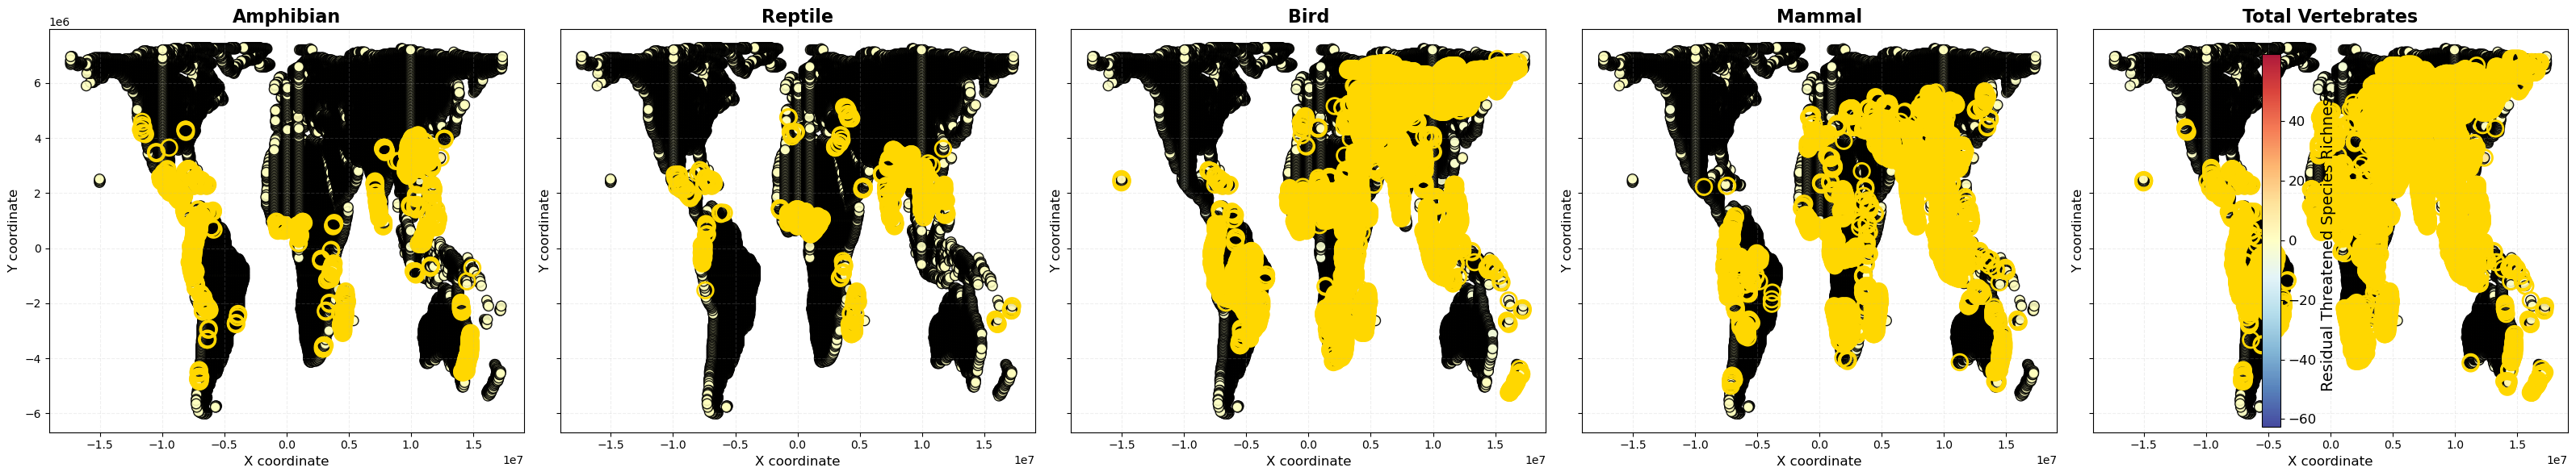

In [ ]:

groups = ["Amphibian", "Reptile", "Bird", "Mammal", "Total Vertebrates"]
max_abs = df[groups].abs().values.max()

fig, axes = plt.subplots(1, 5, figsize=(32,6), sharex=True, sharey=True, facecolor='white')

for ax, group in zip(axes, groups):
    ax.set_facecolor('white')

    sc = ax.scatter(
        df['x'], df['y'],
        c=df[group],
        cmap='RdYlBu_r',
        vmin=-max_abs, vmax=max_abs,
        s=80,
        edgecolor='k',
        alpha=0.9
    )

    hotspots = df[df[group] > hotspot_threshold]
    ax.scatter(
        hotspots['x'], hotspots['y'],
        facecolors='none',
        edgecolors='gold',
        s=200,
        linewidths=2
    )

    ax.set_title(group, fontsize=16, weight='bold')
    ax.grid(True, linestyle='--', alpha=0.2)
    ax.set_xlabel('X coordinate', fontsize=12)
    ax.set_ylabel('Y coordinate', fontsize=12)

cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.03, pad=0.02)
cbar.set_label('Residual Threatened Species Richness', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

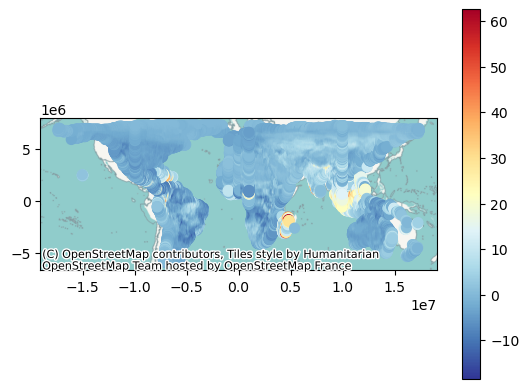

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))
gdf.plot(column='Total Vertebrates', cmap='RdYlBu_r', markersize=50, legend=True)
ctx.add_basemap(plt.gca())
plt.show()

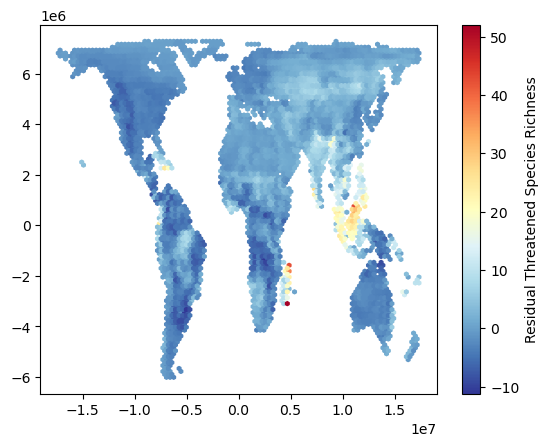

In [ ]:
import numpy as np
plt.hexbin(df['x'], df['y'], C=df['Total Vertebrates'], gridsize=100, cmap='RdYlBu_r', reduce_C_function=np.mean)
plt.colorbar(label='Residual Threatened Species Richness')
plt.show()

In [ ]:
pip install --upgrade pygbif

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# ADDING FEATURE - SPECIES TYPE - FINAL PEICE OF CODE
from pygbif import species

reptile_genera = [
    "Lophognathus", "Liolaemus", "Saproscincus", "Agama", "Plestiodon",
    "Philothamnus", "Sanzinia", "Ctenophorus", "Morethia", "Trimeresurus",
    "Atractus", "Phoenicolacerta", "Causus", "Contia", "Elgaria",
    "Chalcides", "Liodytes", "Chironius", "Tropidurus", "Dipsas",
    "Gallotia", "Pachydactylus", "Vipera", "Anguis", "Oligodon",
    "Pedioplanis", "Sceloporus", "Urosaurus", "Phrynosoma", "Bronchocela",
    "Alligator", "Gambelia", "Cacophis", "Boa", "Trioceros",
    "Pseudechis", "Pseudaspis", "Helicops", "Ctenotus", "Trachylepis",
    "Tiliqua", "Lycodon", "Malayemys", "Elaphe", "Crotaphytus",
    "Pogona", "Nerodia", "Nebulifera", "Python", "Lacerta",
    "Eutropis", "Lampropeltis", "Masticophis", "Afrogecko", "Naja",
    "Takydromus", "Amphisbaena", "Natrix", "Dispholidus", "Holcosus",
    "Furcifer", "Lycophidion", "Cyrtodactylus", "Chamaeleo", "Lamprophis",
    "Coelognathus", "Gambelia", "Lycodonomorphus"
]
reptile_genus_to_group = {genus: "Reptile" for genus in reptile_genera}

order_to_group = {
    'Squamata': 'Reptile', 'Testudines': 'Reptile', 'Crocodylia': 'Reptile',
    'Anura': 'Amphibian', 'Caudata': 'Amphibian',
    'Passeriformes': 'Bird', 'Accipitriformes': 'Bird', 'Columbiformes': 'Bird',
    'Psittaciformes': 'Bird', 'Strigiformes': 'Bird', 'Falconiformes': 'Bird',
    'Carnivora': 'Mammal', 'Primates': 'Mammal', 'Rodentia': 'Mammal', 'Chiroptera': 'Mammal'
}

class_to_group = {
    'Amphibia': 'Amphibian',
    'Aves': 'Bird',
    'Mammalia': 'Mammal'
}

def classify_species(scientific_name):
    try:
        genus = scientific_name.split()[0]

        if genus in reptile_genus_to_group:
            return "Reptile"

        res = species.name_backbone(scientific_name, strict=False)
        cls = res.get('class')
        order = res.get('order')

        if cls in class_to_group:
            return class_to_group[cls]
        if order in order_to_group:
            return order_to_group[order]

        res_genus = species.name_backbone(genus, strict=False)
        cls_genus = res_genus.get('class')
        order_genus = res_genus.get('order')
        if cls_genus in class_to_group:
            return class_to_group[cls_genus]
        if order_genus in order_to_group:
            return order_to_group[order_genus]

        return "Unknown"

    except Exception as e:
        return "Unknown"

In [ ]:
df1 = pd.read_excel("/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx", sheet_name='taxon_names')
df1.columns = df1.columns.str.strip()
df1['Group'] = df1['taxon_names'].apply(classify_species)
with pd.ExcelWriter("/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx", engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df1.to_excel(writer, sheet_name='taxon_names', index=False)

Classification completed and written to Excel.


In [ ]:
print(df1.head())

                taxon_names    Group
0     Lophognathus gilberti  Reptile
1  Patagioenas flavirostris     Bird
2    Cincloramphus cruralis     Bird
3             Dicaeum agile     Bird
4       Orthonyx temminckii     Bird


In [ ]:
# ADDING FEATURE - SPECIES TYPE - FINAL PEICE OF CODE
import pandas as pd


excel_file = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx"


df_locs = pd.read_excel(excel_file, sheet_name='train_locs')
df_ids = pd.read_excel(excel_file, sheet_name='train_ids')
df_taxon_ids = pd.read_excel(excel_file, sheet_name='taxon_ids')
df_taxon_names = pd.read_excel(excel_file, sheet_name='taxon_names')
df_locs = df_locs.rename(columns={0:'latitude', 1:'longitude'})

df_taxon_full = pd.concat([df_taxon_ids.reset_index(drop=True), df_taxon_names.reset_index(drop=True)], axis=1)
df_merged = pd.concat([df_locs[['latitude','longitude']], df_ids[['train_ids']]], axis=1)
df_merged = df_merged[df_merged['train_ids'].isin(df_taxon_full['taxon_ids'])]
df_final = df_merged.merge(
    df_taxon_full,
    left_on='train_ids',
    right_on='taxon_ids',
    how='left'
)

df_final = df_final.rename(columns={'taxon_names':'taxon_name', 'Group':'type'})\
                   [['latitude', 'longitude', 'train_ids', 'taxon_name', 'type']]

print(df_final.head())

    latitude   longitude  train_ids             taxon_name     type
0 -18.286728  143.481247      31529  Lophognathus gilberti  Reptile
1 -13.099798  130.783646      31529  Lophognathus gilberti  Reptile
2 -13.965274  131.695145      31529  Lophognathus gilberti  Reptile
3 -12.853950  132.800507      31529  Lophognathus gilberti  Reptile
4 -12.196790  134.279327      31529  Lophognathus gilberti  Reptile


In [ ]:
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_final.to_excel(writer, sheet_name='merged_data', index=False)


Merged DataFrame saved to new sheet 'merged_data' successfully!


In [ ]:
pip install xarray netCDF4 matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xarray as xr

nc_file = "/Users/jayashreehariharan/Downloads/C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.nc"
ds = xr.open_dataset(nc_file)

print(ds)

<xarray.Dataset> Size: 101GB
Dimensions:              (time: 1, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 8B 2022-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 8GB ...
    processed_flag       (time, lat, lon) float32 34GB ...
    current_pixel_state  (time, lat, lon) float32 34GB ...
    observation_count    (time, lat, lon) uint16 17GB ...
    change_count         (time, lat, lon) uint8 8GB ...
    crs                  int32 4B ...
    lat_bounds           (lat, bounds) float64 1MB ...
    lon_bounds           (lon, bounds) float64 2MB ...
    time_bounds          (time, bounds) datetime64[ns] 16B ...
Attributes: (12/38)
    title:                      Land Cover Map of 2022
    summary:                    This dat

In [ ]:
print(ds.data_vars)

landcover = ds['lccs_class']

lc_array = landcover.values
print(lc_array.shape)

Data variables:
    lccs_class           (time, lat, lon) uint8 8GB ...
    processed_flag       (time, lat, lon) float32 34GB ...
    current_pixel_state  (time, lat, lon) float32 34GB ...
    observation_count    (time, lat, lon) uint16 17GB ...
    change_count         (time, lat, lon) uint8 8GB ...
    crs                  int32 4B ...
    lat_bounds           (lat, bounds) float64 1MB ...
    lon_bounds           (lon, bounds) float64 2MB ...
    time_bounds          (time, bounds) datetime64[ns] 16B ...
(1, 64800, 129600)


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np


ds = xr.open_dataset("/Users/jayashreehariharan/Downloads/C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.nc")

lc = ds['lccs_class'].isel(time=0)

lats = ds['lat'].values
lons = ds['lon'].values

points_df = pd.DataFrame({
    'Latitude': [-18.28672791],
    'Longitude': [143.4812469]
})

def nearest_index(array, value):
    return (np.abs(array - value)).argmin()


land_cover_values = []
for idx, row in points_df.iterrows():
    lat_idx = nearest_index(lats, row['Latitude'])
    lon_idx = nearest_index(lons, row['Longitude'])

    lc_value = lc.values[lat_idx, lon_idx]
    land_cover_values.append(lc_value)

points_df['Land_Cover_Code'] = land_cover_values
print(points_df)

    Latitude   Longitude  Land_Cover_Code
0 -18.286728  143.481247              150


In [ ]:
pip install xarray netCDF4 matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import xarray as xr
import pandas as pd
import numpy as np
excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_test.xlsx"
df = pd.read_excel(excel_path,sheet_name='test_locs')
df = df.rename(columns={0:'latitude', 1:'longitude'})
print(list(df))

['latitude', 'longitude']


In [13]:
# ADDING FEATURE LAND COVER TYPE - FINAL CODE USED
import xarray as xr
import pandas as pd
import numpy as np

#excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx"
excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_test.xlsx"
df = pd.read_excel(excel_path,sheet_name='test_locs')
df = df.rename(columns={0:'latitude', 1:'longitude'}) #Only for test dataset
lat_col = 'latitude'
lon_col = 'longitude'

nc_path = "/Users/jayashreehariharan/Downloads/C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.nc"
ds = xr.open_dataset(nc_path)

lc = ds['lccs_class'].isel(time=0)

lats = ds['lat'].values
lons = ds['lon'].values

def nearest_index(array, value):
    return (np.abs(array - value)).argmin()

land_cover_map = {
    0: {"name": "No Data", "category": "Unknown"},
    10: {"name": "Cropland, rainfed", "category": "Agriculture"},
    11: {"name": "Herbaceous cover", "category": "Agriculture"},
    12: {"name": "Tree or shrub cover", "category": "Agriculture"},
    20: {"name": "Cropland, irrigated or post-flooding", "category": "Agriculture"},
    30: {"name": "Mosaic cropland (>50%) / natural vegetation (<50%)", "category": "Mixed vegetation"},
    40: {"name": "Mosaic natural vegetation (>50%) / cropland (<50%)", "category": "Mixed vegetation"},
    50: {"name": "Tree cover, broadleaved, evergreen, closed to open (>15%)", "category": "Forest"},
    60: {"name": "Tree cover, broadleaved, deciduous, closed to open (>15%)", "category": "Forest"},
    61: {"name": "Tree cover, broadleaved, deciduous, closed to open (>40%)", "category": "Forest"},
    62: {"name": "Tree cover, broadleaved, deciduous, open (15–40%)", "category": "Forest"},
    70: {"name": "Tree cover, needleleaved, evergreen, closed to open (>15%)", "category": "Forest"},
    71: {"name": "Tree cover, needleleaved, evergreen, closed to open (>40%)", "category": "Forest"},
    72: {"name": "Tree cover, needleleaved, evergreen, open (15–40%)", "category": "Forest"},
    80: {"name": "Tree cover, needleleaved, deciduous, closed to open (>15%)", "category": "Forest"},
    81: {"name": "Tree cover, needleleaved, deciduous, closed to open (>40%)", "category": "Forest"},
    82: {"name": "Tree cover, needleleaved, deciduous, open (15–40%)", "category": "Forest"},
    90: {"name": "Tree cover, mixed leaf type (broadleaved + needleleaved)", "category": "Forest"},
    100: {"name": "Mosaic tree and shrub (>50%) / herbaceous cover (<50%)", "category": "Mixed vegetation"},
    110: {"name": "Mosaic herbaceous cover (>50%) / tree and shrub (<50%)", "category": "Mixed vegetation"},
    120: {"name": "Shrubland", "category": "Shrubland"},
    121: {"name": "Evergreen shrubland", "category": "Shrubland"},
    122: {"name": "Deciduous shrubland", "category": "Shrubland"},
    130: {"name": "Grassland", "category": "Grassland"},
    140: {"name": "Lichens and mosses", "category": "Tundra"},
    150: {"name": "Sparse vegetation (tree/shrub/herbaceous cover <15%)", "category": "Semi-arid"},
    151: {"name": "Sparse tree (<15%)", "category": "Semi-arid"},
    152: {"name": "Sparse shrub (<15%)", "category": "Semi-arid"},
    153: {"name": "Sparse herbaceous cover (<15%)", "category": "Semi-arid"},
    160: {"name": "Tree cover, flooded, fresh or brackish water", "category": "Wetlands"},
    170: {"name": "Tree cover, flooded, saline water", "category": "Wetlands"},
    180: {"name": "Shrub or herbaceous cover, flooded, fresh/saline/brackish water", "category": "Wetlands"},
    190: {"name": "Urban areas", "category": "Urban"},
    200: {"name": "Bare areas", "category": "Bare land"},
    201: {"name": "Consolidated bare areas", "category": "Bare land"},
    202: {"name": "Unconsolidated bare areas", "category": "Bare land"},
    210: {"name": "Water bodies", "category": "Water"},
    220: {"name": "Permanent snow & ice", "category": "Ice/Snow"}
}

land_cover_types = []

for idx, row in df.iterrows():
    lat = row[lat_col]
    lon = row[lon_col]

    lat_idx = nearest_index(lats, lat)
    lon_idx = nearest_index(lons, lon)

    lc_code = int(lc.values[lat_idx, lon_idx])

    info = land_cover_map.get(lc_code, {"name": "Unknown", "category": "Unknown"})

    land_cover_types.append(info["category"])

df["Land_Cover_Type"] = land_cover_types

with pd.ExcelWriter(excel_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="test_locs", index=False)

print(df.head())

   latitude   longitude Land_Cover_Type
0  9.630478 -173.535599           Water
1  3.839375 -162.544464           Water
2  4.289169 -167.944778           Water
3  3.879849 -169.720459           Water
4 -6.237210 -169.554123           Water


In [ ]:
pip install earthengine-api

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests

lat = -13.0997982
lon = 130.7836456
url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}"

try:
    r = requests.get(url, timeout=10)
    r.raise_for_status()
    data = r.json()
    if 'results' in data and len(data['results']) > 0:
        elevation = data['results'][0].get('elevation', None)
        print(elevation)
    else:
        print("No elevation data returned")
except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")

98.0


In [ ]:
import pandas as pd
import rasterio

excel_file = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx"
df = pd.read_excel(excel_file,sheet_name='merged_data')

print(df.columns)

raster_path = "/Users/jayashreehariharan/Downloads/GHS_BUILT_S_E2030_GLOBE_R2023A_54009_100_V1_0/GHS_BUILT_S_E2030_GLOBE_R2023A_54009_100_V1_0.tif"
raster = rasterio.open(raster_path)

def sample_raster(lat, lon, raster):
    try:
        row, col = raster.index(lon, lat)
        value = raster.read(1)[row, col]
        return value
    except IndexError:
        return None

df['Urbanization_Index'] = df.apply(
    lambda row: sample_raster(row['latitude'], row['longitude'], raster), axis=1
)

with pd.ExcelWriter(excel_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="merged_data", index=False)

Index(['latitude', 'longitude', 'train_ids', 'taxon_name', 'type',
       'Land_Cover_Type'],
      dtype='object')


In [ ]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
oceans = gpd.read_file("/Users/jayashreehariharan/Downloads/GOaS_v1_20211214/goas_v01.shp")
print(oceans.columns)

Index(['name', 'latitude', 'longitude', 'min_Y', 'min_X', 'max_Y', 'max_X',
       'area_km2', 'geometry'],
      dtype='object')


In [ ]:
pip install fiona

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 16.5 MB/s  0:00:00

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import fiona
fiona.listlayers("/Users/jayashreehariharan/Downloads/gadm_410.gpkg")

['gadm_410']

In [ ]:
gadm = gpd.read_file("/Users/jayashreehariharan/Downloads/gadm_410.gpkg")
print(gadm.columns)

Index(['UID', 'GID_0', 'NAME_0', 'VARNAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'ISO_1', 'HASC_1', 'CC_1', 'TYPE_1', 'ENGTYPE_1',
       'VALIDFR_1', 'GID_2', 'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'HASC_2',
       'CC_2', 'TYPE_2', 'ENGTYPE_2', 'VALIDFR_2', 'GID_3', 'NAME_3',
       'VARNAME_3', 'NL_NAME_3', 'HASC_3', 'CC_3', 'TYPE_3', 'ENGTYPE_3',
       'VALIDFR_3', 'GID_4', 'NAME_4', 'VARNAME_4', 'CC_4', 'TYPE_4',
       'ENGTYPE_4', 'VALIDFR_4', 'GID_5', 'NAME_5', 'CC_5', 'TYPE_5',
       'ENGTYPE_5', 'GOVERNEDBY', 'SOVEREIGN', 'DISPUTEDBY', 'REGION',
       'VARREGION', 'COUNTRY', 'CONTINENT', 'SUBCONT', 'geometry'],
      dtype='object')


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx"
df = pd.read_excel(excel_path,sheet_name='merged_data')

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gadm = gpd.read_file("/Users/jayashreehariharan/Downloads/gadm_410.gpkg")
gadm = gadm[['NAME_0', 'NAME_1', 'geometry']]
gdf_points = gdf_points.to_crs(gadm.crs)
joined = gpd.sjoin(gdf_points, gadm, how="left", predicate="within")
result = joined[['latitude', 'longitude', 'NAME_0', 'NAME_1']]
df["Region"] = result['NAME_1']

with pd.ExcelWriter(excel_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="merged_data", index=False)

#print(result.head())

In [14]:
# ADDING FEATURE REGION IN DATASET - FINAL PEICE OF CODE USED
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

#excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_train.xlsx"
#sheet_name = "merged_data"
excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_test.xlsx"
sheet_name = "test_locs"

df = pd.read_excel(excel_path, sheet_name=sheet_name)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gadm = gpd.read_file("/Users/jayashreehariharan/Downloads/gadm_410.gpkg")
gadm = gadm[['NAME_0', 'NAME_1', 'geometry']]

gdf_points = gdf_points.to_crs(gadm.crs)

gdf_points = gpd.sjoin(
    gdf_points,
    gadm,
    how="left",
    predicate="within",
    lsuffix='left',
    rsuffix='right'
)

candidates = gdf_points[gdf_points['NAME_1'].isna()].copy()
if 'index_right' in candidates.columns:
    candidates.drop(columns=['index_right'], inplace=True)

goas = gpd.read_file("/Users/jayashreehariharan/Downloads/GOaS_v1_20211214/goas_v01.shp")
marine_name_col = 'name'

candidates = candidates.to_crs(goas.crs)

marine_points = gpd.sjoin(
    candidates,
    goas[['geometry', marine_name_col]],
    how="left",
    predicate="within",
    lsuffix='left',
    rsuffix='right'
)

gdf_points['region'] = gdf_points['NAME_1']

gdf_points.loc[gdf_points.index.isin(marine_points.index), 'region'] = marine_points[marine_name_col].values

def polar_region(lat):
    if lat < -60:
        return "Ice/Snow"
    elif lat > 75:
        return "Ice/Snow"
    else:
        return None

mask_unknown = gdf_points['region'].isna() | (gdf_points['region']=="")
gdf_points.loc[mask_unknown, 'region'] = gdf_points.loc[mask_unknown, 'latitude'].apply(polar_region)

gdf_points['region'] = gdf_points['region'].fillna("Unknown")

output_cols = df.columns.tolist() + ['region']
final_df = gdf_points[output_cols]

from openpyxl import load_workbook

with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    final_df.to_excel(writer, sheet_name=sheet_name, index=False)


In [1]:
# ADDING FEATURE - ANNUAL AVERAGE TEMPERATURE & PRECIPITATION - FINAL PEICE OF CODE USED
import os
import pandas as pd
import rasterio
from shapely.geometry import Point
import numpy as np

#excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/Merged_train_data.xlsx"
#sheet_name = "merged_data"
excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_test.xlsx"
sheet_name = "test_locs"

df = pd.read_excel(excel_path, sheet_name=sheet_name)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

tmin_folder = "/Users/jayashreehariharan/Downloads/wc2.1_cruts4.09_5m_tmin_2020-2024"
tmax_folder = "/Users/jayashreehariharan/Downloads/wc2.1_cruts4.09_5m_tmax_2020-2024"
prec_folder = "/Users/jayashreehariharan/Downloads/wc2.1_cruts4.09_5m_prec_2020-2024"

tmin_files = sorted([os.path.join(tmin_folder, f) for f in os.listdir(tmin_folder) if f.endswith(".tif")])
tmax_files = sorted([os.path.join(tmax_folder, f) for f in os.listdir(tmax_folder) if f.endswith(".tif")])
prec_files = sorted([os.path.join(prec_folder, f) for f in os.listdir(prec_folder) if f.endswith(".tif")])

def extract_raster_values(raster_files, points):
    values_all = []
    for f in raster_files:
        with rasterio.open(f) as src:
            vals = []
            for pt in points:
                try:
                    val = list(src.sample([(pt.x, pt.y)]))[0][0]
                    if np.isnan(val):
                        val = np.nan
                except:
                    val = np.nan
                vals.append(val)
            values_all.append(vals)
    return list(map(list, zip(*values_all)))

tmin_values = extract_raster_values(tmin_files, geometry)
tmax_values = extract_raster_values(tmax_files, geometry)
prec_values = extract_raster_values(prec_files, geometry)

def group_by_year(files):
    groups = {}
    for i, f in enumerate(files):
        year = os.path.basename(f).split("_")[-1].split("-")[0]
        groups.setdefault(year, []).append(i)
    return groups

tmin_groups = group_by_year(tmin_files)
tmax_groups = group_by_year(tmax_files)
prec_groups = group_by_year(prec_files)

for year in tmin_groups.keys():
    tavg_year = []
    prec_year = []

    for point_idx in range(len(df)):
        tmin_months = [tmin_values[point_idx][i] for i in tmin_groups[year]]
        tmax_months = [tmax_values[point_idx][i] for i in tmax_groups[year]]
        prec_months = [prec_values[point_idx][i] for i in prec_groups[year]]

        tavg_months = [(tmin + tmax) / 2 if not np.isnan(tmin) and not np.isnan(tmax) else np.nan
                       for tmin, tmax in zip(tmin_months, tmax_months)]

        tavg_year.append(np.nanmean(tavg_months))
        prec_year.append(np.nanmean(prec_months))

    df[f'tavg_{year}_mean'] = tavg_year
    df[f'prec_{year}_mean'] = prec_year

from openpyxl import load_workbook

with pd.ExcelWriter(excel_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name=sheet_name, index=False)


/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:67: RuntimeWarning: Mean of empty slice
  tavg_year.append(np.nanmean(tavg_months))
/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:68: RuntimeWarning: Mean of empty slice
  prec_year.append(np.nanmean(prec_months))
/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:67: RuntimeWarning: Mean of empty slice
  tavg_year.append(np.nanmean(tavg_months))
/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:68: RuntimeWarning: Mean of empty slice
  prec_year.append(np.nanmean(prec_months))
/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:67: RuntimeWarning: Mean of empty slice
  tavg_year.append(np.nanmean(tavg_months))
/var/folders/3c/mlps6zvx11l75_fk761ppwlr0000gn/T/ipykernel_37998/1987693660.py:68: RuntimeWarning: Mean of empty slice
  prec_year.append(np.nanmean(prec_months))
/var/folders/3c/mlps6z

In [3]:
# ADDING FEATURE - ELEVATION - FINAL PEICE OF CODE USED
import rasterio
import pandas as pd
from shapely.geometry import Point
import numpy as np
import os

#excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/Merged_train_data.xlsx"
#sheet_name = "merged_data"
excel_path = "/Users/jayashreehariharan/Desktop/AML_Project/Species-2/species/species_test.xlsx"
sheet_name = "test_locs"

df = pd.read_excel(excel_path, sheet_name=sheet_name)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

elev_path = "/Users/jayashreehariharan/Downloads/wc2.1_5m_elev.tif"

elevation_values = []
with rasterio.open(elev_path) as src:
    for pt in geometry:
        try:
            val = list(src.sample([(pt.x, pt.y)]))[0][0]
            if np.isnan(val):
                val = np.nan
        except:
            val = np.nan
        elevation_values.append(val)

df["elevation"] = elevation_values

from openpyxl import load_workbook

with pd.ExcelWriter(excel_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name=sheet_name, index=False)

✅ Done! Elevation values added to Excel sheet.
